# Vizualizacija neurona u kitty mreži



Napokon smo stigli do (veganskog) "mesa" radionice! Gledat ćemo što jako aktivira neurone/"kanale" u kitty mreži.

### Definicije i importovi

In [2]:
pip install --quiet torch-lucent

Note: you may need to restart the kernel to use updated packages.


In [1]:
from lucent.optvis.transform import pad, jitter, random_rotate, random_scale
from lucent.optvis import render, param, transform, objectives
from math import sqrt, floor
import torchvision

/usr/local/lib/python3.6/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch

from lucent.optvis import render, param, transform, objectives

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class LongcatNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(3, 9, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        
        self.conv2_bn = nn.BatchNorm2d(9)
        self.conv2 = nn.Conv2d(9, 16, 3)
        self.pool2 = nn.MaxPool2d(2, 2)
        
        self.conv3_bn = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 25, 3)
        self.pool3 = nn.MaxPool2d(2, 2)
        
        self.conv4_bn = nn.BatchNorm2d(25)
        self.conv4 = nn.Conv2d(25, 36, 3)
        self.pool4 = nn.MaxPool2d(2, 2)
        
        self.conv5_bn = nn.BatchNorm2d(36)
        self.conv5 = nn.Conv2d(36, 36, 3)
  
        self.conv6_bn = nn.BatchNorm2d(36)
        self.conv6 = nn.Conv2d(36, 49, 3)

        self.conv7_bn = nn.BatchNorm2d(49)
        self.conv7 = nn.Conv2d(49, 49, 3)
        
        self.conv8_bn = nn.BatchNorm2d(49)
        self.conv8 = nn.Conv2d(49, 49, 3)
        
        self.conv9_bn = nn.BatchNorm2d(49)
        self.conv9 = nn.Conv2d(49, 49, 3)
        self.pool9 = nn.MaxPool2d(2, 2)

        self.conv10_bn = nn.BatchNorm2d(49)
        self.conv10 = nn.Conv2d(49, 49, 3)
        self.pool10 = nn.MaxPool2d(2, 2)

        self.fc = nn.Linear(1764, 4)

    def forward(self, x):
        x = self.bn1(x)
        x = self.conv2_bn(self.pool1(F.relu(self.conv1(x))))
        x = self.conv3_bn(self.pool2(F.relu(self.conv2(x))))
        x = self.conv4_bn(self.pool3(F.relu(self.conv3(x))))
        x = self.conv5_bn(self.pool4(F.relu(self.conv4(x))))

        x = self.conv6_bn(F.relu(self.conv5(x)))  
        x = self.conv7_bn(F.relu(self.conv6(x)))
        x = self.conv8_bn(F.relu(self.conv7(x)))
        x = self.conv9_bn(F.relu(self.conv8(x)))
        
        
        x = self.conv10_bn(self.pool9(F.relu(self.conv9(x))))
        x = self.pool10(F.relu(self.conv10(x)))
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        
        x = self.fc(x)
        return x

In [5]:
longcat = LongcatNet()
longcat = longcat.to(device)

longcat.load_state_dict(torch.load('saved_models/longcat/epoch_7_batch_5000.pth', map_location=device))

<All keys matched successfully>

In [6]:
longcat.to(device).eval()

LongcatNet(
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): Conv2d(3, 9, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_bn): BatchNorm2d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(9, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 25, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4_bn): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(25, 36, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5_bn): BatchNorm2d(36, eps=

In [7]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


### Prolaz jedne slike

In [10]:
transform_test = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

test_data = torchvision.datasets.ImageFolder(root='dataset/test', transform=transform_test)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=1, shuffle=True, num_workers=1)

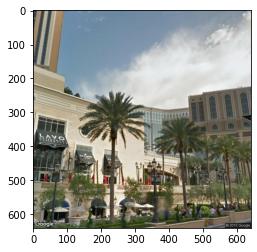

In [30]:
def imshow(img, transpose = True):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(images[0])

In [34]:
print(labels[0])

tensor(2)


In [31]:
outputs = longcat(images.cuda())
_, predicted = torch.max(outputs, 1)

In [32]:
predicted

tensor([2], device='cuda:0')

In [33]:
print(test_data.class_to_idx)

{'Amsterdam': 0, 'Firenca': 1, 'LasVegas': 2, 'NYC': 3}


In [35]:
def show_activations(activations_dict, layer, grid_dims):
    n_row = grid_dims
    n_col = grid_dims
    _, axs = plt.subplots(n_row, n_col, figsize=(19.55, 20))
    axs = axs.flatten()
    for ix, ax in zip(range(n_row*n_col), axs):
        ax.matshow(activations_dict[layer][0].cpu()[ix, :, :], cmap='viridis')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.margins(x=0, y=0, tight=True)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

#### Start

In [37]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

longcat.conv1.register_forward_hook(get_activation('conv1'))
longcat.conv2.register_forward_hook(get_activation('conv2'))
longcat.conv3.register_forward_hook(get_activation('conv3'))
longcat.conv4.register_forward_hook(get_activation('conv4'))
longcat.conv5.register_forward_hook(get_activation('conv5'))
longcat.conv6.register_forward_hook(get_activation('conv6'))
longcat.conv7.register_forward_hook(get_activation('conv7'))
longcat.conv8.register_forward_hook(get_activation('conv8'))
longcat.conv9.register_forward_hook(get_activation('conv9'))
longcat.conv10.register_forward_hook(get_activation('conv10'))


output = longcat(images.cuda())

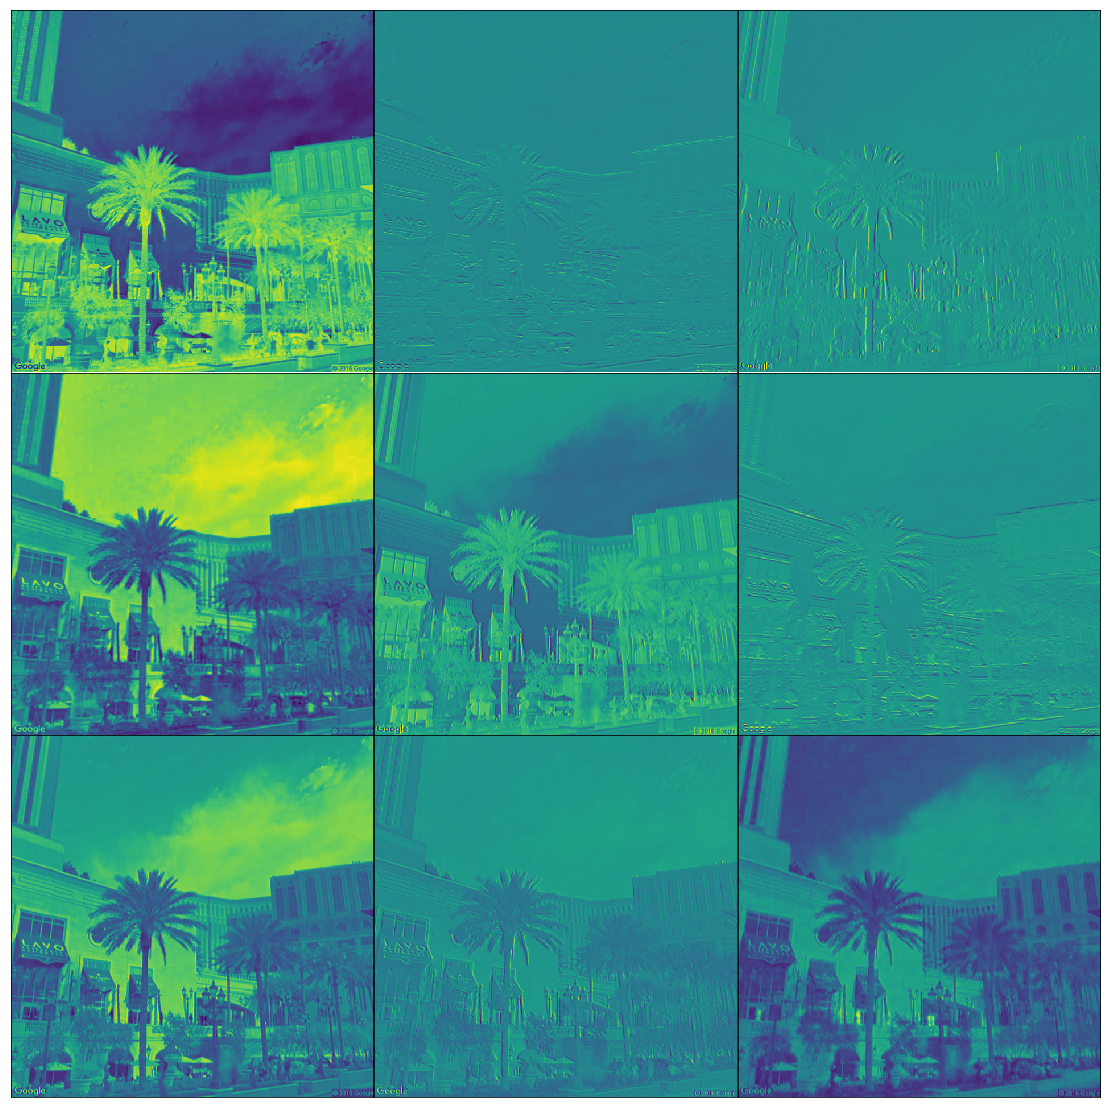

In [38]:
show_activations(activation, 'conv1', 3)

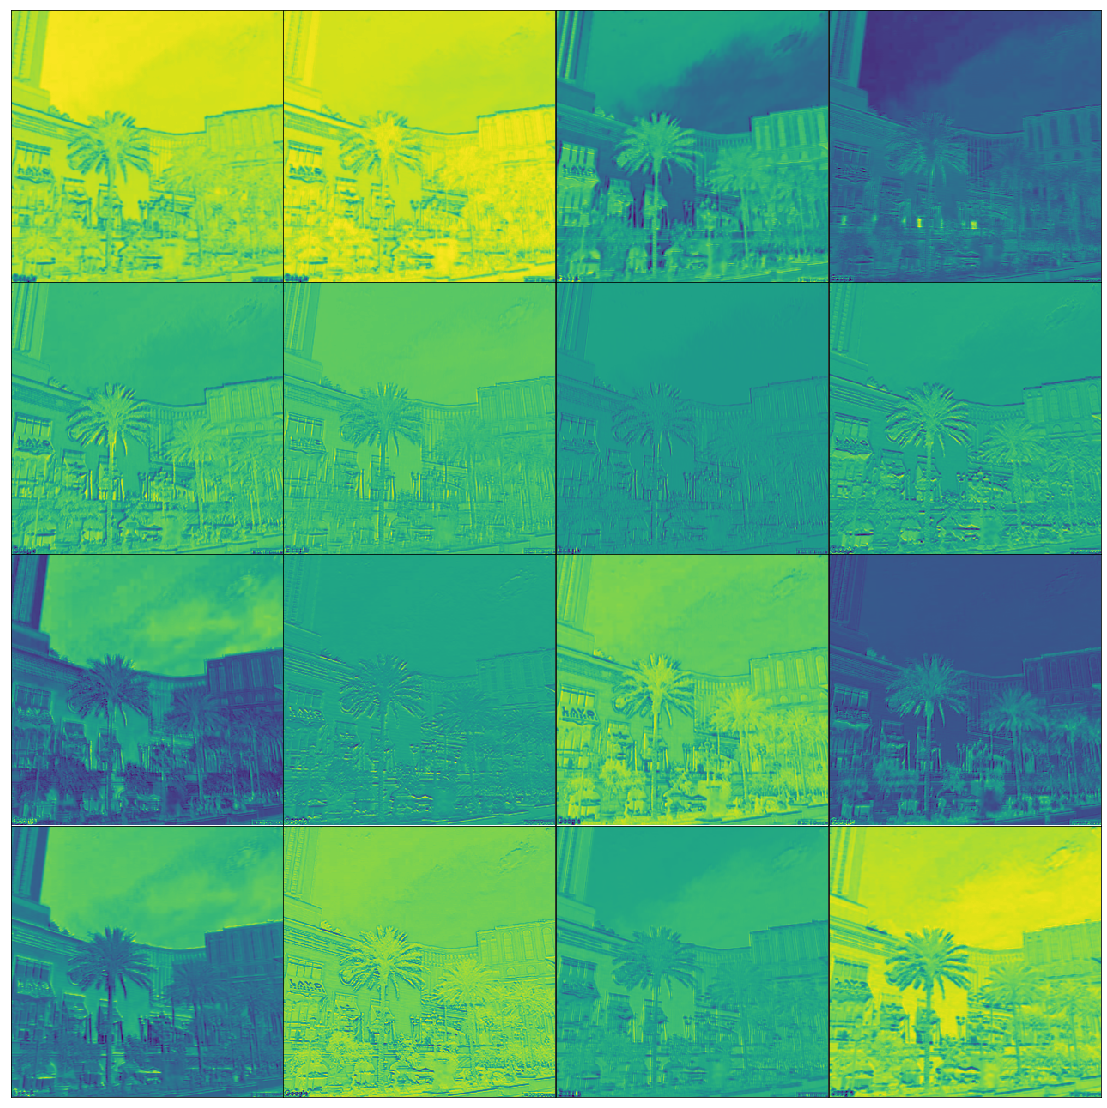

In [39]:
show_activations(activation, 'conv2', 4)

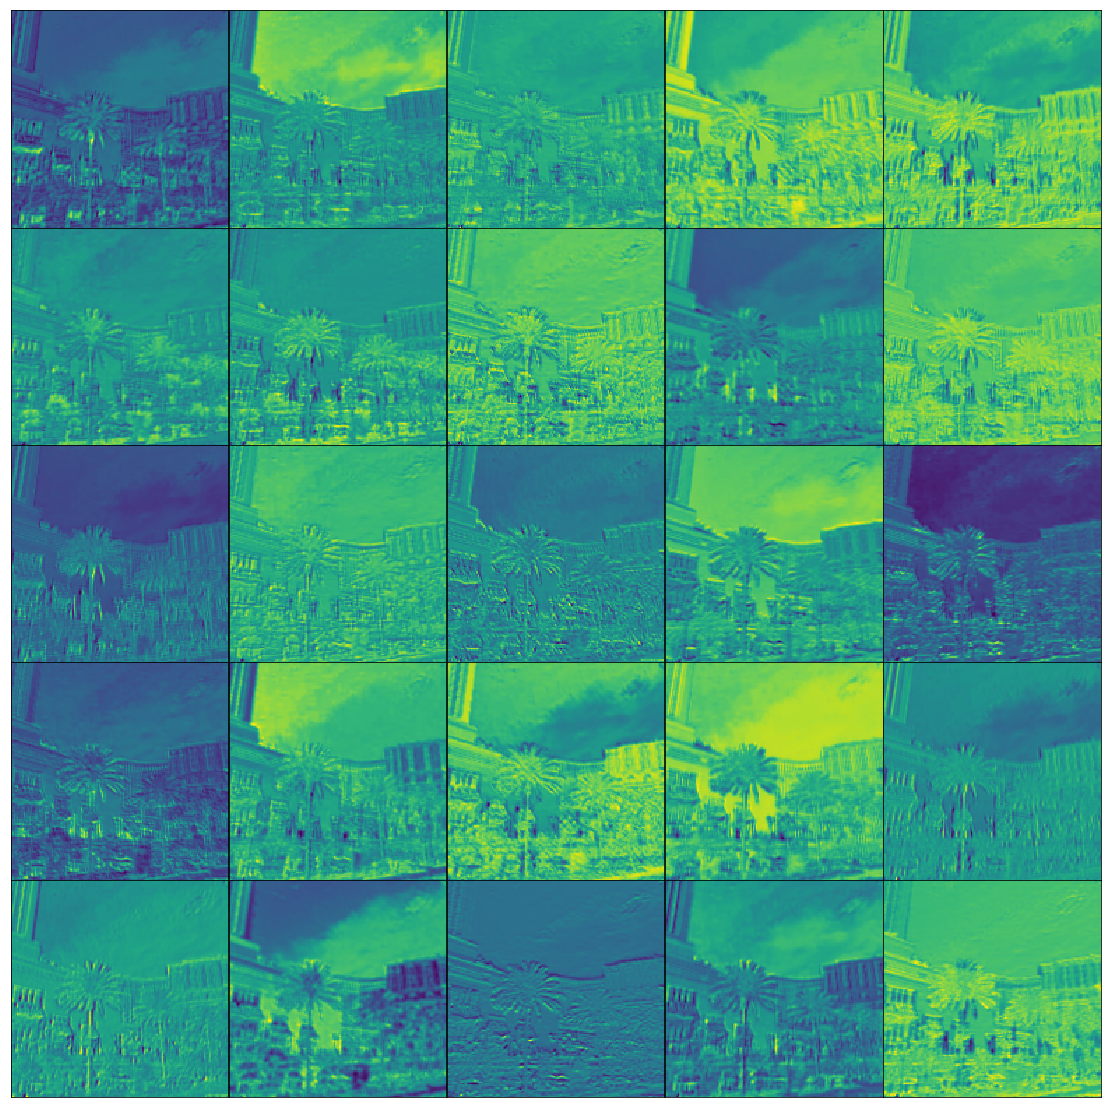

In [40]:
show_activations(activation, 'conv3', 5)

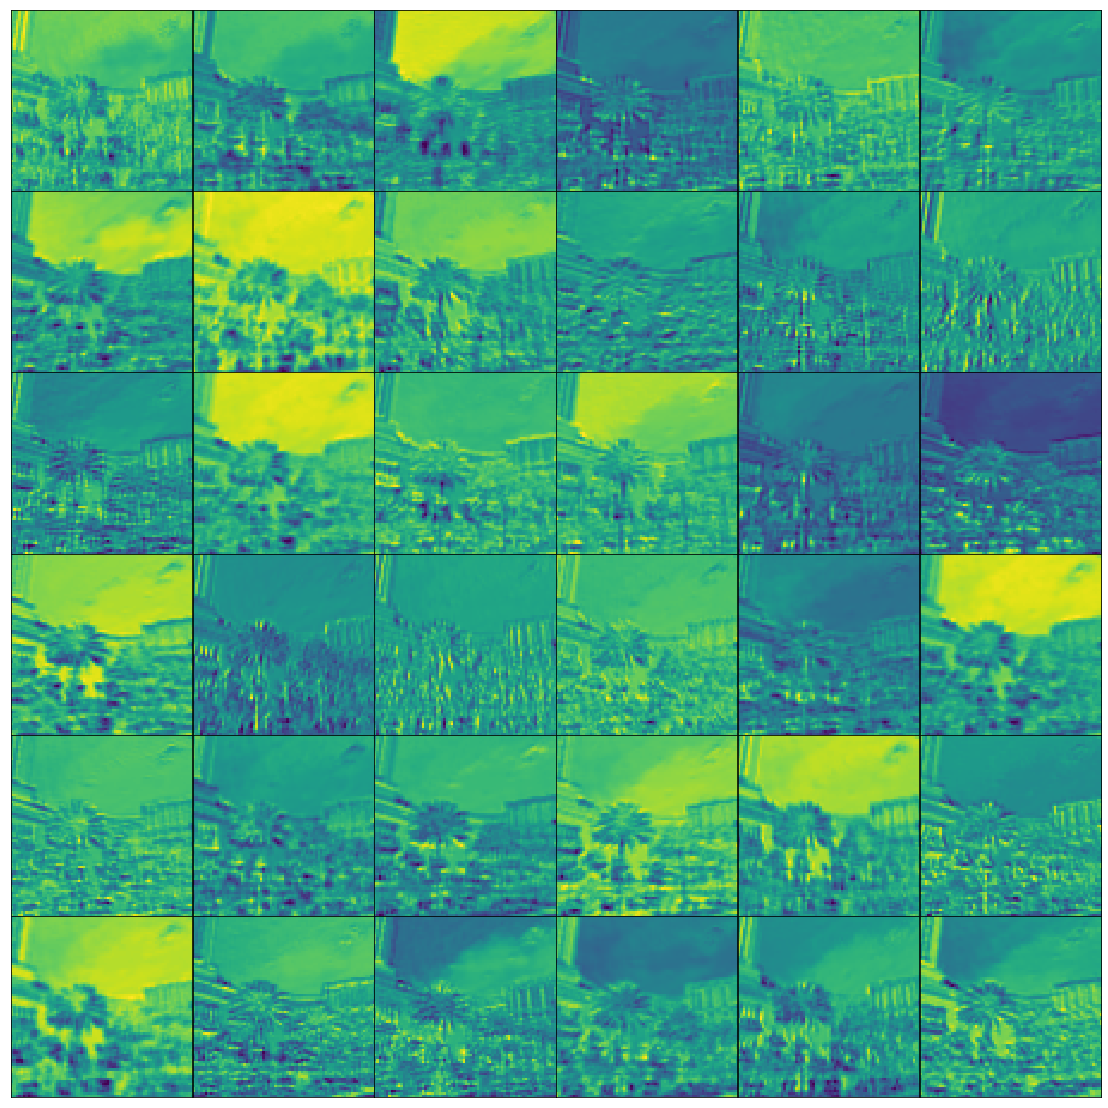

In [41]:
show_activations(activation, 'conv4', 6)

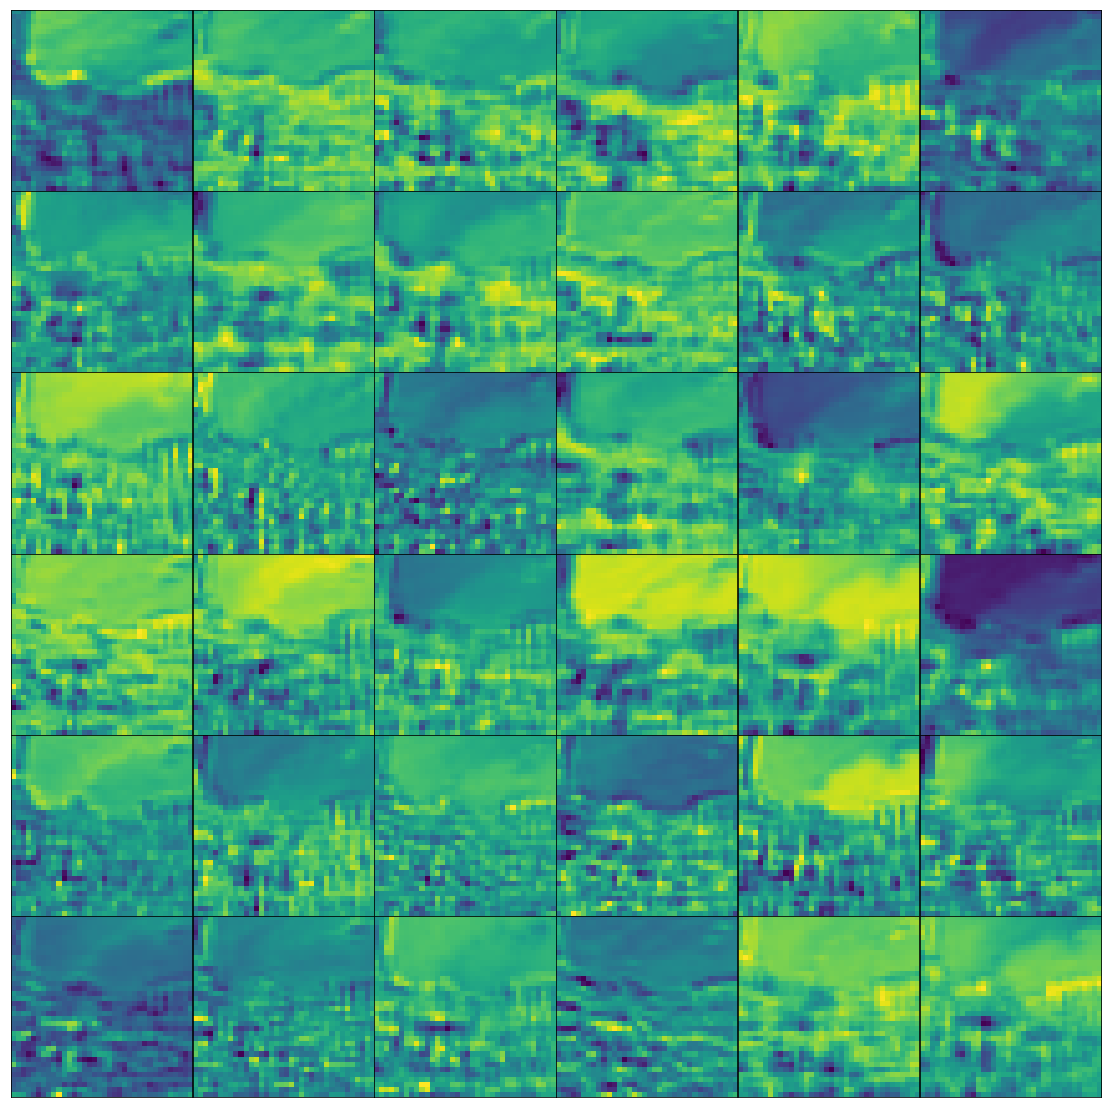

In [43]:
show_activations(activation, 'conv5', 6)

### Lucent vizualizacija

Lucent je PyTorch library nastao na Tensorflow library Lucid, kojeg su razvili ljudi iz Google Braina za _circuits research_.

In [10]:
def lucent_show_layer(model, layer, n_channels,
                      param_f=None, transforms=None,
                      optimizer=None, preprocess=True, image_size=128):
    n_row = int( floor( sqrt( n_channels ) ) )
    n_col = int( floor( sqrt( n_channels ) ) )
    _, axs = plt.subplots(n_row, n_col, figsize=(19.55, 20))
    axs = axs.flatten()
    for ix, ax in zip(range(n_row*n_col), axs):
        img = render.render_vis(model, f"{layer}:{ix}", param_f=param_f,
                                transforms=transforms, preprocess=preprocess, progress=False, show_image=False)[0]
        img = np.reshape(img, (image_size, image_size, 3))
        ax.imshow(img)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.margins(x=0, y=0, tight=True)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

### Sloj po sloj—

<center> <h3> 1. </h3> </center>

In [ ]:
lucent_show_layer(longcat, 'conv1', 9,
                  param_f=lambda: param.image(128),
                  image_size=128)

<center> <h3> 2. </h3> </center>

In [ ]:
lucent_show_layer(longcat, 'conv2', 16,
                  param_f=lambda: param.image(128),
                  image_size=128)

<center> <h3> 3. </h3> </center>

In [ ]:
lucent_show_layer(longcat, 'conv3', 25,
                  param_f=lambda: param.image(128),
                  image_size=128)

<center> <h3> 4. </h3> </center>

lucent_show_layer(longcat, 'conv4', 36,
                  param_f=lambda: param.image(128),
                  image_size=128)

<center> <h3> 5. </h3> </center>

lucent_show_layer(longcat, 'conv5', 36,
                  param_f=lambda: param.image(128),
                  image_size=128)

<center> <h3> 6. </h3> </center>

lucent_show_layer(longcat, 'conv6', 49,
                  param_f=lambda: param.image(128),
                  image_size=128)

<center> <h3> 7. </h3> </center>

lucent_show_layer(longcat, 'conv7', 49,
                  param_f=lambda: param.image(128),
                  image_size=128)

<center> <h3> 8. </h3> </center>

lucent_show_layer(longcat, 'conv8', 49,
                  param_f=lambda: param.image(128),
                  image_size=128)

<center> <h3> 9. </h3> </center>

lucent_show_layer(longcat, 'conv9', 49,
                  param_f=lambda: param.image(128),
                  image_size=128)

# Captum vizualizacija

In [145]:
!pip3 uninstall --quiet captum --y
!git clone https://github.com/pytorch/captum
%cd captum
!git checkout "optim-wip"
!pip3 install -e .
import sys
sys.path.append('/content/captum')
%cd ..

fatal: destination path 'captum' already exists and is not an empty directory.
/home/src/LUMEN-Interpretability/captum
Already on 'optim-wip'
Your branch is up to date with 'origin/optim-wip'.
Obtaining file:///home/src/LUMEN-Interpretability/captum
  Preparing metadata (setup.py) ... done
  Running setup.py develop for captum
/home/src/LUMEN-Interpretability


In [8]:
import captum.optim as optimviz
import torchvision

In [9]:
from typing import Callable, Iterable, Optional

In [10]:
def vis_neuron_large(
    model: torch.nn.Module, target: torch.nn.Module, channel: int
) -> None:
    image = optimviz.images.NaturalImage((640, 640)).to(device)
    transforms = torch.nn.Sequential(
        torch.nn.ReflectionPad2d(2),
        optimviz.transforms.RandomSpatialJitter(8),
        optimviz.transforms.RandomScale(scale=(2.15, 1.85, 2, 1.95, 2.05)),
        torchvision.transforms.RandomRotation(degrees=(-15, 15)),
        optimviz.transforms.RandomSpatialJitter(64),
        optimviz.transforms.CenterCrop((640, 640)),
    )
    loss_fn = optimviz.loss.NeuronActivation(target, channel)
    obj = optimviz.InputOptimization(model, loss_fn, image, transforms)
    history = obj.optimize(optimviz.optimization.n_steps(512, False))
    return image()

In [11]:
def visualize_layer_captum(model, layer, grid_dim):
    n_row = grid_dim
    n_col = grid_dim
    _, axs = plt.subplots(n_row, n_col, figsize=(19.55, 20))
    axs = axs.flatten()
    for ix, ax in zip(range(n_row*n_col), axs):
        img = vis_neuron_large(model, layer, ix)
        img = img.permute(0, 2, 3, 1)
        with torch.no_grad():
            img = img.cpu().numpy()
        img = img.reshape((640,640,3))
        ax.imshow(img)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.margins(x=0, y=0, tight=True)


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

<center> <h3> 1. </h3> </center>

In [ ]:
visualize_layer_captum(longcat, longcat.conv1, 3)

<center> <h3> 2. </h3> </center>

In [ ]:
visualize_layer_captum(longcat, longcat.conv2, 4)

<center> <h3> 3. </h3> </center>

In [ ]:
visualize_layer_captum(longcat, longcat.conv3, 5)

<center> <h3> 4. </h3> </center> 

In [ ]:
visualize_layer_captum(longcat, longcat.conv4, 6)

<center> <h3> 5. </h3> </center>

In [ ]:
visualize_layer_captum(longcat, longcat.conv5, 6)

<center> <h3> 6. </h3> </center>

In [ ]:
visualize_layer_captum(longcat, longcat.conv6, 7)

<center> <h3> 7. </h3> </center>

In [ ]:
visualize_layer_captum(longcat, longcat.conv7, 7)

<center> <h3> 8. </h3> </center>

In [ ]:
visualize_layer_captum(longcat, longcat.conv8, 7)

<center> <h3> 9. </h3> </center>

In [ ]:
visualize_layer_captum(longcat, longcat.conv9, 7)

<center> <h3> 10. </h3> </center>

In [ ]:
visualize_layer_captum(longcat, longcat.conv10, 7)